In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/star-type-classification/Stars.csv


In [2]:
df = pd.read_csv("/kaggle/input/star-type-classification/Stars.csv")
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [3]:
df.describe()

,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


In [5]:
for col in df.select_dtypes(include="object").columns:
    print(f"{col}: {df[col].unique()}")


Color: ['Red' 'Blue White' 'White' 'Yellowish White' 'Blue white'
 'Pale yellow orange' 'Blue' 'Blue-white' 'Whitish' 'yellow-white'
 'Orange' 'White-Yellow' 'white' 'yellowish' 'Yellowish' 'Orange-Red'
 'Blue-White']
Spectral_Class: ['M' 'B' 'A' 'F' 'O' 'K' 'G']


In [6]:
df["Color"] = df["Color"].replace({
    "Blue White": "Blue-White",
    "Blue white": "Blue-White",
    "Blue-white": "Blue-White",
    "White": "Whiteish",
    "white": "Whiteish",
    "Whitish": "Whiteish",
    "Yellowish White": "Yellowish",
    "Yellow-white": "Yellowish",
    "yellow-white": "Yellowish",
    "White-Yellow": "Yellowish",
    "yellowish": "Yellowish",
    "Yellowish": "Yellowish"
})

df["Color"].unique()


array(['Red', 'Blue-White', 'Whiteish', 'Yellowish', 'Pale yellow orange',
       'Blue', 'Orange', 'Orange-Red'], dtype=object)

In [7]:
color_map = {name: i for i, name in enumerate(df["Color"].unique())}
spectral_map = {name: i for i, name in enumerate(df["Spectral_Class"].unique())}

df["Color"] = df["Color"].map(color_map)
df["Spectral_Class"] = df["Spectral_Class"].map(spectral_map)


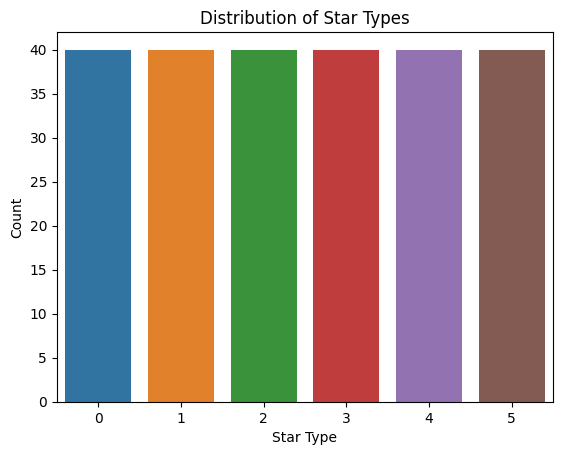

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Type", data=df)
plt.title("Distribution of Star Types")
plt.xlabel("Star Type")
plt.ylabel("Count")
plt.show()


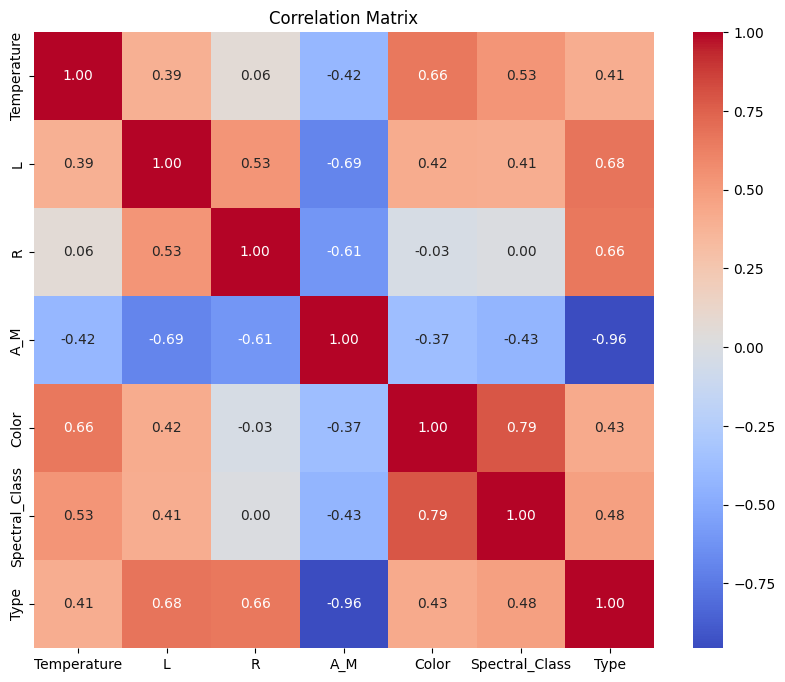

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


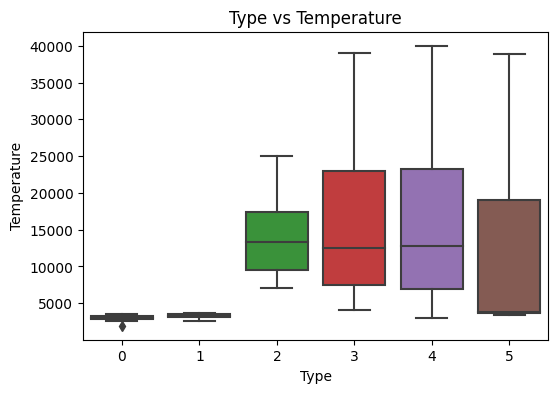

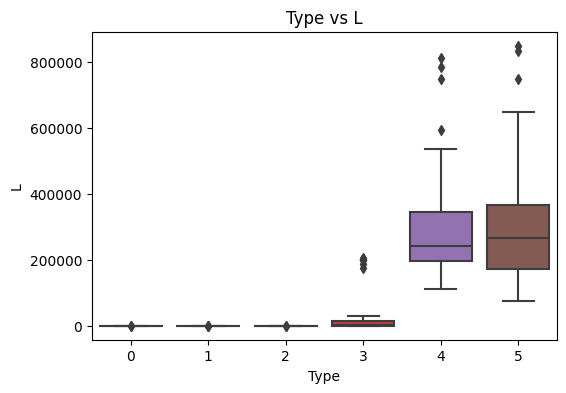

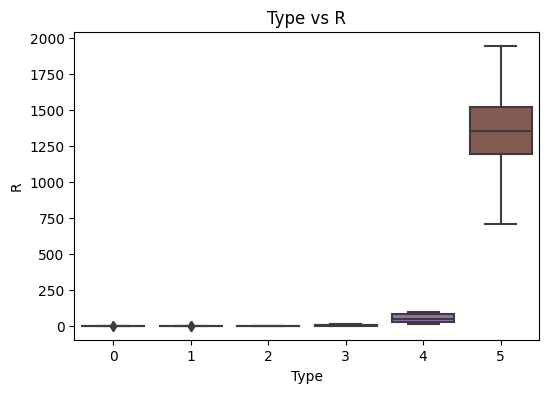

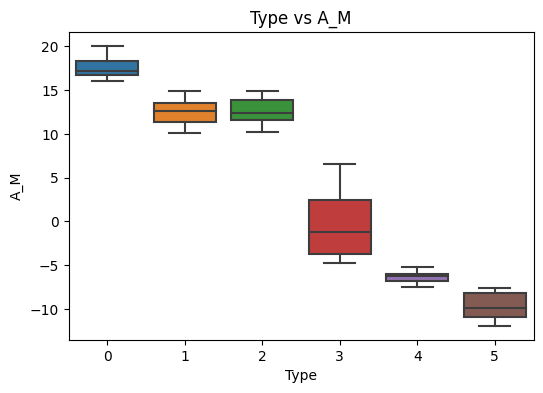

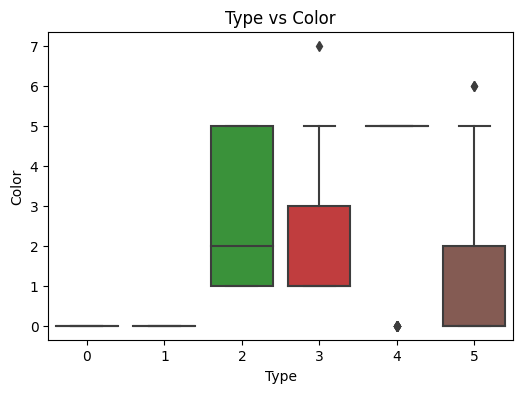

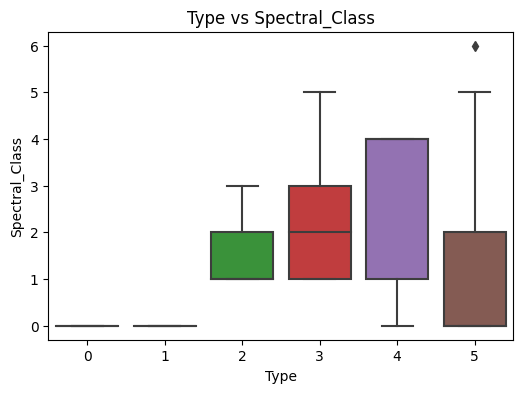

In [10]:
for col in df.columns:
    if col != "Type":
        plt.figure(figsize=(6, 4))
        sns.boxplot(x="Type", y=col, data=df)
        plt.title(f"Type vs {col}")
        plt.show()

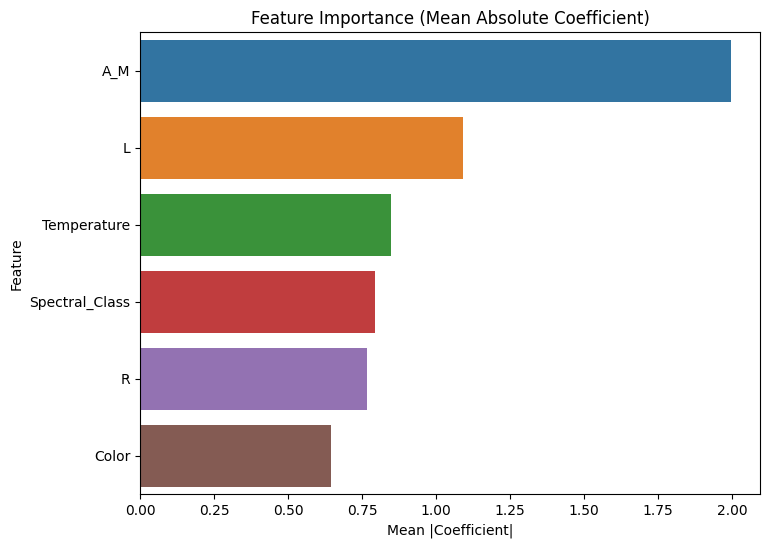

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df.drop(columns=["Type"])
y = df["Type"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000)
model.fit(X_train, y_train)

coefs = pd.DataFrame(model.coef_.T, index=X.columns)
coefs["mean_abs"] = coefs.abs().mean(axis=1)
coefs = coefs.sort_values("mean_abs", ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=coefs["mean_abs"], y=coefs.index)
plt.title("Feature Importance (Mean Absolute Coefficient)")
plt.xlabel("Mean |Coefficient|")
plt.ylabel("Feature")
plt.show()


In [12]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        11

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48

